# Simple Linear Regression
<a name='1'></a>
## 1 - Simple Linear Regression


<a name='1.1'></a>
### - Simple Linear Regression Model

You can describe a simple linear regression model as

$$\hat{y} = wx + b,\tag{1}$$

where $\hat{y}$ is a prediction of dependent variable $y$ based on independent variable $x$ using a line equation with the slope $w$ and intercept $b$. 

Given a set of training data points $(x_1, y_1)$, ..., $(x_m, y_m)$, you will find the "best" fitting line - such parameters $w$ and $b$ that the differences between original values $y_i$ and predicted values $\hat{y}_i = wx_i + b$ are minimum.

<a name='1.2'></a>
### - Neural Network Model with a Single Perceptron and One Input Node

The simplest neural network model that describes the above problem can be realized by using one **perceptron**. The **input** and **output** layers will have one **node** each ($x$ for input and $\hat{y} = z$ for output):

<!-- ![Single perceptron](images/nn_model_linear_regression_simple.png){width=400px} -->
```{figure} images/nn_model_linear_regression_simple.png
:width: 400px
:name: nn_model_linear_regression_simple

Single perceptron
```

**Weight** ($w$) and **bias** ($b$) are the parameters that will get updated when you **train** the model. They are initialized to some random values or set to 0 and updated as the training progresses.

For each training example $x^{(i)}$, the prediction $\hat{y}^{(i)}$ can be calculated as:

$$
z^{(i)} =  w x^{(i)} + b
$$

$$
\hat{y}^{(i)} = z^{(i)}
\tag{2}
$$

where $i = 1, \dots, m$.

You can organise all training examples as a vector $X$ of size ($1 \times m$) and perform scalar multiplication of $X$ ($1 \times m$) by a scalar $w$, adding $b$, which will be broadcasted to a vector of size ($1 \times m$):

$$
Z =  w X + b
$$

$$
\hat{Y} = Z
\tag{3}
$$

This set of calculations is called **forward propagation**.

For each training example you can measure the difference between original values $y^{(i)}$ and predicted values $\hat{y}^{(i)}$ with the **loss function** $L\left(w, b\right)  = \frac{1}{2}\left(\hat{y}^{(i)} - y^{(i)}\right)^2$. Division by $2$ is taken just for scaling purposes, you will see the reason below, calculating partial derivatives. To compare the resulting vector of the predictions $\hat{Y}$ ($1 \times m$) with the vector $Y$ of original values $y^{(i)}$, you can take an average of the loss function values for each of the training examples:

$$
\mathcal{L}\left(w, b\right)  = \frac{1}{2m}\sum_{i=1}^{m} \left(\hat{y}^{(i)} - y^{(i)}\right)^2
\tag{4}
$$

This function is called the sum of squares **cost function**. The aim is to optimize the cost function during the training, which will minimize the differences between original values $y^{(i)}$ and predicted values $\hat{y}^{(i)}$.

When your weights were just initialized with some random values, and no training was done yet, you can't expect good results. You need to calculate the adjustments for the weight and bias, minimizing the cost function. This process is called **backward propagation**. 

According to the gradient descent algorithm, you can calculate partial derivatives as:

$$
\frac{\partial \mathcal{L} }{ \partial w } = 
\frac{1}{m}\sum_{i=1}^{m} \left(\hat{y}^{(i)} - y^{(i)}\right)x^{(i)}
$$

$$
\frac{\partial \mathcal{L} }{ \partial b } = 
\frac{1}{m}\sum_{i=1}^{m} \left(\hat{y}^{(i)} - y^{(i)}\right)
\tag{5}
$$

You can see how the additional division by $2$ in the equation $(4)$ helped to simplify the results of the partial derivatives. Then update the parameters iteratively using the expressions

$$
w = w - \alpha \frac{\partial \mathcal{L} }{ \partial w }
$$

$$
b = b - \alpha \frac{\partial \mathcal{L} }{ \partial b }
\tag{6}
$$

where $\alpha$ is the learning rate. Then repeat the process until the cost function stops decreasing.

The general **methodology** to build a neural network is to:
1. Define the neural network structure ( # of input units,  # of hidden units, etc). 
2. Initialize the model's parameters
3. Loop:
    - Implement forward propagation (calculate the perceptron output),
    - Implement backward propagation (to get the required corrections for the parameters),
    - Update parameters.
4. Make predictions.

You often build helper functions to compute steps 1-3 and then merge them into one function `nn_model()`. Once you've built `nn_model()` and learnt the right parameters, you can make predictions on new data.

In [50]:
# Import all the required packages
import numpy as np
import matplotlib.pyplot as plt
# A library for data manipulation and analysis
import pandas as pd

# Output of plotting commands is displayed within the Jupyter notebook
%matplotlib inline

# Set a seed so that the results are consistent accross sessions.
np.random.seed(3)

### Dataset
Load the [Kaggle dataset](https://www.kaggle.com/code/devzohaib/simple-linear-regression/notebook), saved in `../data/tvmarketing.csv`. It has two fields: TV marketing expenses (`TV`) and sales amount (`Sales`).

In [51]:
path = 'data/tvmarketing.csv'
adv = pd.read_csv(path)

Print some part of the dataset

In [52]:
adv.head()

TV  Sales
0  230.1   22.1
1   44.5   10.4
2   17.2    9.3
3  151.5   18.5
4  180.8   12.9

Plot the data points to see how they are distributed. You can use `plt.plot()` function from `matplotlib.pyplot` module.

<Axes: xlabel='TV', ylabel='Sales'>

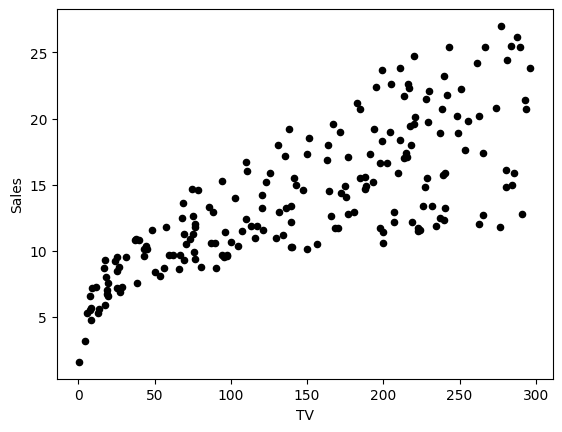

In [53]:
adv.plot(x='TV', y='Sales', kind='scatter', c='black')

Normalize the data by subtracting the mean and dividing by the standard deviation. This will help the model to converge faster during training, and to avoid different units of measurement in the input data.

Normalized data have mean 0 and standard deviation 1. The following cell performs column-wise normalization of the dataset:

In [54]:
adv_norm = (adv - np.mean(adv, axis=0)) / np.std(adv, axis=0) # As omitting axis for np.std() is depracated, to avoid error, we must pass axis
adv_norm.head()

TV     Sales
0  0.969852  1.552053
1 -1.197376 -0.696046
2 -1.516155 -0.907406
3  0.052050  0.860330
4  0.394182 -0.215683

In [55]:
X_norm = adv_norm['TV'] # type pd.Series
Y_norm = adv_norm['Sales'] # type pd.Series

# Convert to np.array first to be able to reshape
X_norm = np.array(X_norm).reshape(1, -1)
Y_norm = np.array(Y_norm).reshape(1, -1)

X_norm.shape, Y_norm.shape

((1, 200), (1, 200))

Plot the data points to see how they are distributed.

<Axes: xlabel='TV', ylabel='Sales'>

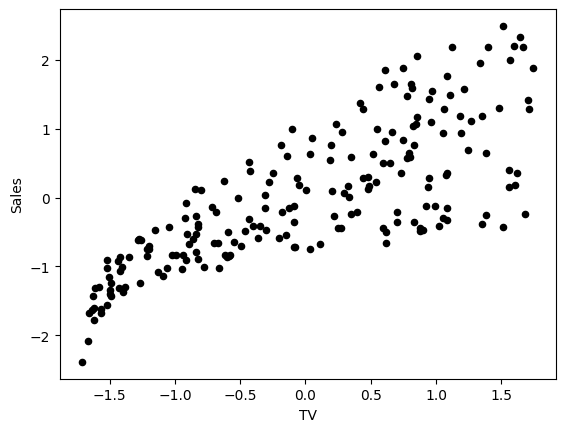

In [56]:
adv_norm.plot(x='TV', y='Sales', kind='scatter', c='black')

In [57]:
def layer_sizes(X, Y):
    """
    Arguments:
    X -- input dataset of shape (input size, number of examples)
    Y -- labels of shape (output size, number of examples)
    
    Returns:
    n_x -- the size of the input layer
    n_y -- the size of the output layer
    """
    
    n_x, n_y = X.shape[0], Y.shape[0]
    
    return (n_x, n_y)

n_x, n_y = layer_sizes(X_norm, Y_norm)
print(n_x, n_y)

1 1


In [58]:
def initialize_parameters(n_x, n_y):
    """
    Returns:
    params -- python dictionary containing your parameters:
                    W -- weight matrix of shape (n_y, n_x)
                    b -- bias value set as a vector of shape (n_y, 1)
    """
    
    W = np.random.randn(n_y, n_x) * 0.01 # scales down with std of 0.01 to avoid large computations later on
    b = np.zeros((n_y, 1))
    
    params = {"W": W,
              "b": b}
    
    return params

parameters = initialize_parameters(n_x, n_y)
print(parameters["W"], parameters["b"])

[[0.01788628]] [[0.]]


Implement `forward_propagation()` following the equation $(3)$:

$$
Z =  w X + b
$$

$$
\hat{Y} = Z
$$

In [59]:
def forward_propagation(X, parameters):
    """
    Argument:
    X -- input data of size (n_x, m)
    parameters -- python dictionary containing your parameters (output of initialization function)
    
    Returns:
    Y_hat -- The output of size (n_y, m)
    """
    
    W = parameters["W"]
    b = parameters["b"]
    Y_hat = W @ X + b
    
    return Y_hat

Y_hat = forward_propagation(X_norm, parameters)
print("Some element of predicted Y_hat values: ", Y_hat[0, :5])

Some element of predicted Y_hat values:  [ 0.01734705 -0.02141661 -0.02711838  0.00093098  0.00705046]


Your weights were just initialized with some random values, so the model has not been trained yet. 

Define a cost function $(4)$ which will be used to train the model:

$$\mathcal{L}\left(w, b\right)  = \frac{1}{2m}\sum_{i=1}^{m} \left(\hat{y}^{(i)} - y^{(i)}\right)^2$$

In [60]:
def compute_cost(Y_hat, Y):
    """
    Computes the cost function as a sum of squares
    
    Arguments:
    Y_hat -- The output of the neural network of shape (n_y, number of examples)
    Y -- "true" labels vector of shape (n_y, number of examples)
    
    Returns:
    cost -- sum of squares scaled by 1/(2*number of examples)
    
    """
    
    # Number of examples
    m = Y_hat.shape[1]
    
    # Compute cost
    cost = np.sum((Y_hat - Y)**2) / (2*m)
    
    return cost

print(f"cost = {str(compute_cost(Y_hat, Y_norm))}")

cost = 0.48616887080159704


Calculate partial derivatives as shown in $(5)$:

$$
\frac{\partial \mathcal{L} }{ \partial w } = 
\frac{1}{m}\sum_{i=1}^{m} \left(\hat{y}^{(i)} - y^{(i)}\right)x^{(i)}
$$

$$
\frac{\partial \mathcal{L} }{ \partial b } = 
\frac{1}{m}\sum_{i=1}^{m} \left(\hat{y}^{(i)} - y^{(i)}\right)
$$

In [61]:
def backward_propagation(Y_hat, X, Y):
    """
    Implements the backward propagation, calculating gradients
    
    Arguments:
    Y_hat -- the output of the neural network of shape (n_y, number of examples)
    X -- input data of shape (n_x, number of examples)
    Y -- "true" labels vector of shape (n_y, number of examples)
    
    Returns:
    grads -- python dictionary containing gradients with respect to different parameters
    """
    
    m = X.shape[1]
    
    dZ = Y_hat - Y
    dW = 1/m * (dZ @ X.T)
    db = 1/m * np.sum(dZ, axis=1, keepdims=True) # Sum over rows, and do not reduce dimensions. e.g. (n_y,) -> (n_y, 1)
    
    grads = {"dW": dW,
             "db": db}
    
    return grads

grads = backward_propagation(Y_hat, X_norm, Y_norm)
print("dW = " + str(grads["dW"]))
print("db = " + str(grads["db"]))

dW = [[-0.76433814]]
db = [[1.687539e-16]]


Update parameters as shown in $(6)$:

$$
w = w - \alpha \frac{\partial \mathcal{L} }{ \partial w }
$$

$$
b = b - \alpha \frac{\partial \mathcal{L} }{ \partial b }
$$

In [62]:
def update_parameters(parameters, grads, learning_rate=1.2):
    """
    Updates parameters using the gradient descent update rule
    
    Arguments:
    parameters -- python dictionary containing parameters 
    grads -- python dictionary containing gradients 
    learning_rate -- learning rate parameter for gradient descent
    
    Returns:
    parameters -- python dictionary containing updated parameters 
    """
    
    W = parameters["W"] - learning_rate * grads["dW"]
    b = parameters["b"] - learning_rate * grads["db"]
    
    parameters = {"W": W,
                  "b": b}
    
    return parameters

updated_params = update_parameters(parameters, grads)
print("W updated = " + str(updated_params["W"]))
print("b updated = " + str(updated_params["b"]))

W updated = [[0.93509205]]
b updated = [[-2.0250468e-16]]


Put everything together in the function `nn_model()`.

In [63]:
def nn_model(X, Y, num_iterations=10, learning_rate=1.2, print_cost=False):
    """
    Arguments:
    X -- dataset of shape (n_x, number of examples)
    Y -- labels of shape (n_y, number of examples)
    num_iterations -- number of iterations in the loop
    learning_rate -- learning rate parameter for gradient descent
    print_cost -- if True, print the cost every iteration
    
    Returns:
    parameters -- parameters learnt by the model. They can then be used to make predictions.
    """
    
    n_x, n_y = layer_sizes(X, Y)
    
    parameters = initialize_parameters(n_x, n_y)
    
    for i in range(num_iterations):
        
        # Forward propagation. Inputs: "X, parameters". Output: "Y_hat".
        Y_hat = forward_propagation(X, parameters)
        
        # Cost function. Inputs: "Y_hat, Y". Output: "cost".
        cost = compute_cost(Y_hat, Y)
        
        # Backpropagation. Inputs: "Y_hat, X, Y". Output: "grads".
        grads = backward_propagation(Y_hat, X, Y)
        
        # Gradient descent parameter update. Inputs: "parameters, grads, learning_rate". Output: "parameters".
        parameters = update_parameters(parameters, grads, learning_rate)
        
        if print_cost:
            print(f"Cost after iteration {i}: {cost}")
    
    return parameters    

In [64]:
parameters_simple = nn_model(X_norm, Y_norm, num_iterations=30, learning_rate=1.2, print_cost=True)
print("W = " + str(parameters_simple["W"]))
print("b = " + str(parameters_simple["b"]))

W_simple = parameters["W"]
b_simple = parameters["b"]

Cost after iteration 0: 0.49659504037484803
Cost after iteration 1: 0.20616377720695983
Cost after iteration 2: 0.1945465266802443
Cost after iteration 3: 0.1940818366591757
Cost after iteration 4: 0.19406324905833294
Cost after iteration 5: 0.19406250555429921
Cost after iteration 6: 0.19406247581413788
Cost after iteration 7: 0.19406247462453144
Cost after iteration 8: 0.19406247457694714
Cost after iteration 9: 0.1940624745750438
Cost after iteration 10: 0.19406247457496764
Cost after iteration 11: 0.19406247457496462
Cost after iteration 12: 0.19406247457496448
Cost after iteration 13: 0.19406247457496448
Cost after iteration 14: 0.19406247457496448
Cost after iteration 15: 0.19406247457496448
Cost after iteration 16: 0.19406247457496448
Cost after iteration 17: 0.19406247457496448
Cost after iteration 18: 0.19406247457496448
Cost after iteration 19: 0.19406247457496448
Cost after iteration 20: 0.19406247457496448
Cost after iteration 21: 0.19406247457496448
Cost after iteration 22

In [65]:
def predict(X, Y, parameters, X_pred):
    W = parameters["W"]
    b = parameters["b"]
    
    # Use the same mean and standard deviation of the original training array X.
    """
        Handling of X for normalization:

        - If X is a Pandas Series:
            np.mean(X) and np.std(X) return scalar values (shape ()), 
            because a Series is essentially a 1D array of values. 
            This case typically corresponds to having only one feature column.
            In this scenario, we store mean and std as scalars and normalize X_pred 
            using these scalars, then reshape it to (1, len(X_pred)) so that it 
            matches the expected shape for matrix multiplication with W.

        - If X is a Pandas DataFrame:
            np.mean(X) and np.std(X) return a Pandas Series containing 
            column-wise means and standard deviations. Converting them to NumPy 
            arrays produces a 1D vector of shape (n_features,). 
            We reshape them to (n_features, 1) so they can be broadcasted 
            correctly during normalization of X_pred. 
            This case typically corresponds to having multiple feature columns.
    """
    
    if isinstance(X, pd.Series):
        X_mean = np.mean(X)
        X_std = np.std(X)
        X_pred_norm = ((X_pred - X_mean) / X_std).reshape((1, len(X_pred)))
    else:
        X_mean = np.array(np.mean(X, axis=0)).reshape((len(X.axes[1]), 1))
        X_std = np.array(np.std(X, axis=0)).reshape((len(X.axes[1]), 1))
        X_pred_norm = (X_pred - X_mean) / X_std
        
    # Make predictions
    Y_pred_norm = W @ X_pred_norm + b
    
    # Convert back using same mean and std of original training Y
    Y_pred = Y_pred_norm * np.std(Y) + np.mean(Y)
    
    return Y_pred[0]

X_pred = np.array([230.1, 44.2, 8.6])
Y_pred = predict(adv["TV"], adv["Sales"], parameters_simple, X_pred)
print(f"TV marketing expenses:\n{X_pred}")
print(f"Predictions of sales:\n{Y_pred}")

TV marketing expenses:
[230.1  44.2   8.6]
Predictions of sales:
[17.97077451  9.13371306  7.44140866]


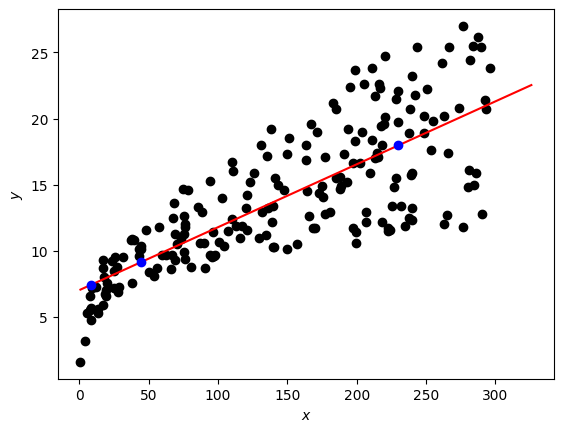

In [66]:
fig, ax = plt.subplots()
ax.scatter(adv["TV"], adv["Sales"], c="black")

ax.set_xlabel("$x$")
ax.set_ylabel("$y$")

X_line = np.arange(np.min(adv["TV"]), np.max(adv["TV"])*1.1, 0.1)
Y_line = predict(adv["TV"], adv["Sales"], parameters_simple, X_line)
ax.plot(X_line, Y_line, "r")
ax.plot(X_pred, Y_pred, "bo") # blue dots
plt.plot()
plt.show()

<a name='2'></a>
## 2 - Multiple Linear Regression
<a name='2.1'></a>
### - Neural Network Model with a Single Perceptron and Two Input Nodes

Let's build a linear regression model for a Kaggle dataset [House Prices](https://www.kaggle.com/c/house-prices-advanced-regression-techniques), saved in a file `..data/house_prices_train.csv`. You will use two fields - ground living area (`GrLivArea`, square feet) and rates of the overall quality of material and finish (`OverallQual`, 1-10) to predict sales price (`SalePrice`, dollars).

In [67]:
path = 'data/house_prices_train.csv'
df = pd.read_csv(path)

In [68]:

X_multi = df[['GrLivArea', 'OverallQual']]
Y_multi = df['SalePrice']
X_multi.shape, Y_multi.shape

((1460, 2), (1460,))

In [69]:
display(X_multi)
display(Y_multi)

GrLivArea  OverallQual
0          1710            7
1          1262            6
2          1786            7
3          1717            7
4          2198            8
...         ...          ...
1455       1647            6
1456       2073            6
1457       2340            7
1458       1078            5
1459       1256            5

[1460 rows x 2 columns]

0       208500
1       181500
2       223500
3       140000
4       250000
         ...  
1455    175000
1456    210000
1457    266500
1458    142125
1459    147500
Name: SalePrice, Length: 1460, dtype: int64

In [70]:

X_multi_norm = (X_multi - np.mean(X_multi, axis=0)) / np.std(X_multi, axis=0)
Y_multi_norm = (Y_multi - np.mean(Y_multi)) / np.std(Y_multi, axis=0)
X_multi_norm.shape, Y_norm.shape


((1460, 2), (1, 200))

In [71]:
X_multi_norm = np.array(X_multi_norm).T
Y_multi_norm = np.array(Y_multi_norm).reshape((1, len(Y_multi_norm)))
X_norm.shape, Y_multi_norm.shape

((1, 200), (1, 1460))

In [72]:
print(X_multi_norm[:, :5], Y_multi_norm[0, :5])

[[ 0.37033344 -0.48251191  0.51501256  0.38365915  1.2993257 ]
 [ 0.65147924 -0.07183611  0.65147924  0.65147924  1.3747946 ]] [ 0.34727322  0.00728832  0.53615372 -0.51528106  0.8698426 ]


In [73]:
parameters_multi = nn_model(X_multi_norm, Y_multi_norm, num_iterations=100, print_cost=True)

W = parameters_multi["W"]
b = parameters_multi["b"]
print(f"W: {parameters_multi['W']} and b: {parameters_multi['b']}")

Cost after iteration 0: 0.5142195119760039
Cost after iteration 1: 0.44862664805802294
Cost after iteration 2: 0.3962236237408893
Cost after iteration 3: 0.35322650244442194
Cost after iteration 4: 0.3176388968906906
Cost after iteration 5: 0.28810227675703015
Cost after iteration 6: 0.2635663230551014
Cost after iteration 7: 0.2431787775092655
Cost after iteration 8: 0.22623677631465744
Cost after iteration 9: 0.21215762854913936
Cost after iteration 10: 0.20045746930524147
Cost after iteration 11: 0.19073428857122826
Cost after iteration 12: 0.1826540289332285
Cost after iteration 13: 0.1759390850066516
Cost after iteration 14: 0.170358759895168
Cost after iteration 15: 0.1657213378223942
Cost after iteration 16: 0.16186749718900195
Cost after iteration 17: 0.15866483686740238
Cost after iteration 18: 0.1560033274486568
Cost after iteration 19: 0.1537915311054225
Cost after iteration 20: 0.1519534601860057
Cost after iteration 21: 0.15042596661037508
Cost after iteration 22: 0.149156

In [74]:
X_multi_pred = np.array([[1710, 7], [1200, 6], [2200, 8]]).T
Y_multi_pred = predict(X_multi, Y_multi, parameters_multi, X_multi_pred)

print(f"Ground living area, square feet:\n{X_multi_pred[0]}")
print(f"Rates of the overall quality of material and finish, 1-10:\n{X_multi_pred[1]}")
print(f"Predictions of sales price, $:\n{np.round(Y_multi_pred)}")

Ground living area, square feet:
[1710 1200 2200]
Rates of the overall quality of material and finish, 1-10:
[7 6 8]
Predictions of sales price, $:
[221371. 160039. 281587.]


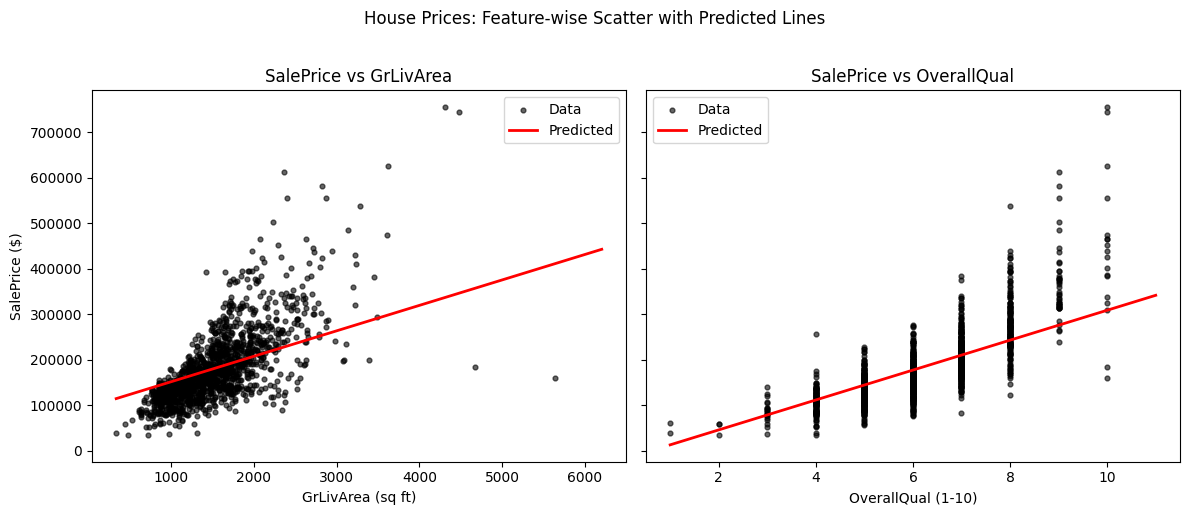

In [75]:
# Ensure X_multi and Y_multi exist; if not, load
try:
    X_multi
    Y_multi
except NameError:
    df = pd.read_csv('../data/house_prices_train.csv')
    X_multi = df[['GrLivArea', 'OverallQual']]
    Y_multi = df['SalePrice']

# Ensure trained parameters are available (no retraining here)
if 'parameters_multi' not in globals():
    raise RuntimeError("Trained parameters 'parameters_multi' not found. Please run the training cell above first.")

# Build prediction grids while fixing the other feature at its mean (original scale)
x1 = np.linspace(X_multi['GrLivArea'].min(), X_multi['GrLivArea'].max() * 1.1, 200)
x2_fixed = float(X_multi['OverallQual'].mean())
X_pred1 = np.vstack([x1, np.full_like(x1, x2_fixed)])  # shape (2, 200)
y1 = predict(X_multi, Y_multi, parameters_multi, X_pred1)

x2 = np.linspace(X_multi['OverallQual'].min(), X_multi['OverallQual'].max() * 1.1, 200)
x1_fixed = float(X_multi['GrLivArea'].mean())
X_pred2 = np.vstack([np.full_like(x2, x1_fixed), x2])  # shape (2, 200)
y2 = predict(X_multi, Y_multi, parameters_multi, X_pred2)

# Plot
fig, axes = plt.subplots(1, 2, figsize=(12, 5), sharey=True)

# Subplot 1: SalePrice vs GrLivArea
axes[0].scatter(X_multi['GrLivArea'], Y_multi, s=12, alpha=0.6, color='black', label='Data')
axes[0].plot(x1, y1, color='red', linewidth=2, label='Predicted')
axes[0].set_xlabel('GrLivArea (sq ft)')
axes[0].set_ylabel('SalePrice ($)')
axes[0].set_title('SalePrice vs GrLivArea')
axes[0].legend(loc='best')

# Subplot 2: SalePrice vs OverallQual
axes[1].scatter(X_multi['OverallQual'], Y_multi, s=12, alpha=0.6, color='black', label='Data')
axes[1].plot(x2, y2, color='red', linewidth=2, label='Predicted')
axes[1].set_xlabel('OverallQual (1-10)')
axes[1].set_title('SalePrice vs OverallQual')
axes[1].legend(loc='best')

fig.suptitle('House Prices: Feature-wise Scatter with Predicted Lines', y=1.02)
plt.tight_layout()
plt.show()